/home/ubuntu/kitti-3d-detection-unzipped/testing/image_2/003917.png
0.25303956866264343


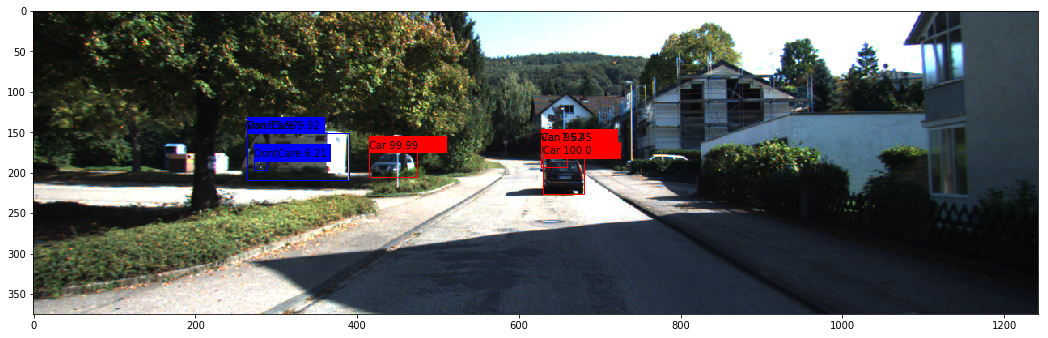

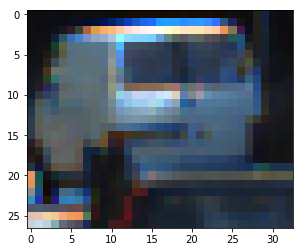

im a Van and i am 95.4474687576294 percent sure


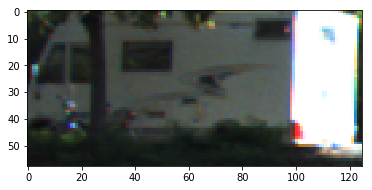

im a Van and i am 75.96567869186401 percent sure


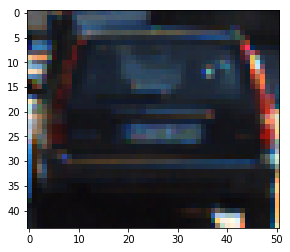

im a Car and i am 99.99902248382568 percent sure


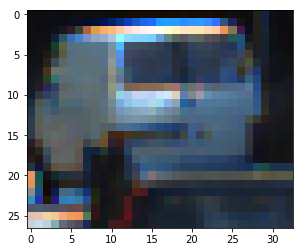

im a Car and i am 7.620244473218918 percent sure


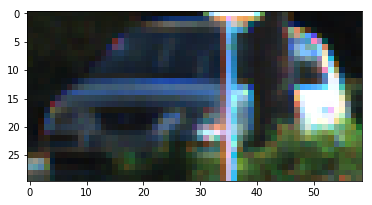

im a Car and i am 99.99328851699829 percent sure


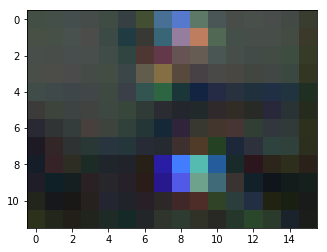

im a DontCare and i am 6.208487972617149 percent sure


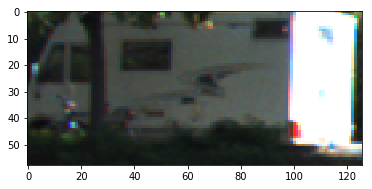

im a DontCare and i am 9.919445216655731 percent sure
0.25303956866264343


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import os
import random
from six.moves import cPickle as pkl
#please input number between 351-700
numimage=3917
categories = ['Cyclist','Tram','Person_sitting','Truck','Pedestrian','Van','Car','Misc','DontCare']
colors =['r','g','r','b','r','b','b','c','m']
colors = ['r','g','b','c','m','y','r','g','b']
def getImageStr(id):
    str1="/home/ubuntu/kitti-3d-detection-unzipped/testing/image_2/"+str(id).zfill(6)+".png"
    print(str1)
    return str1
def getInfo(imid):
    with open('checkpoints2/blue.pkl.chonker','rb') as file:
        data=pkl.load(file)
        for dctn in data:
            if (dctn['image_id']==imid):
                for i in range(4):
                    dctn['bbox'][i]=int(dctn['bbox'][i])
                yield (dctn['bbox'],dctn['category_id'],dctn['score'],dctn['conv'])
        print(data[0]['score'])
                    

#id to read?
img = cv2.imread(getImageStr(numimage))
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111, aspect='equal')

for imin in getInfo(numimage):
    box=imin[0]
    
    # Create a Rectangle patch
    rect = patches.Rectangle((box[0],box[1]),box[2],box[3],linewidth=1,edgecolor=colors[imin[1]-1],facecolor='none')
    rect_text = patches.Rectangle((box[0],box[1]-20),95,20,linewidth=1,edgecolor=colors[imin[1]-1],facecolor=colors[imin[1]-1])

    # Add the patch to the Axes
    ax.add_patch(rect)
    ax.add_patch(rect_text)
    ax.text(box[0],box[1]-5,categories[imin[1]-1] + " " + str(round(imin[2]*100,2)))

plt.imshow(img)
plt.show()

for imin in getInfo(numimage):
    box=imin[0]
    
    # Create a Rectangle patch
    rect = patches.Rectangle((box[0],box[1]),box[2],box[3],linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)
    
    plt.imshow(img[box[1]:box[1]+box[3],box[0]:box[0]+box[2]])
    plt.show()
    print("im a "+categories[imin[1]-1]+" and i am "+str(imin[2]*100)+" percent sure")
    


In [29]:
import pickle
data = pickle.load(open('./checkpoints2/old/kistre.pkl', 'rb'))
    


In [30]:
image_num=5

data[0]

#print(data[image_num][0]['feat'][0].shape)
#print(len(data[image_num][0]['bbox']))

[{'bbox': array([], shape=(0, 5), dtype=float32),
  'feat': array([], shape=(0, 256, 7, 7), dtype=float32)},
 {'bbox': array([], shape=(0, 5), dtype=float32),
  'feat': array([], shape=(0, 256, 7, 7), dtype=float32)},
 {'bbox': array([], shape=(0, 5), dtype=float32),
  'feat': array([], shape=(0, 256, 7, 7), dtype=float32)},
 {'bbox': array([], shape=(0, 5), dtype=float32),
  'feat': array([], shape=(0, 256, 7, 7), dtype=float32)},
 {'bbox': array([], shape=(0, 5), dtype=float32),
  'feat': array([], shape=(0, 256, 7, 7), dtype=float32)},
 {'bbox': array([], shape=(0, 5), dtype=float32),
  'feat': array([], shape=(0, 256, 7, 7), dtype=float32)},
 {'bbox': array([[5.3911035e+02, 1.8523759e+02, 5.7689703e+02, 2.1181024e+02,
          9.9990368e-01],
         [7.1789117e+02, 1.8625960e+02, 7.8697430e+02, 2.3539461e+02,
          9.8993850e-01],
         [7.3281732e+02, 1.7716083e+02, 8.4355530e+02, 2.5871570e+02,
          9.9995089e-01],
         [5.9921533e+02, 1.8295903e+02, 6.1925500e

In [13]:
found=True
failcounter=0
for i in range(7518):
    found=False
    for anno in data:
        if anno['image_id']==i:
            found=True
            #print('found')
    if found:
        a=1+1
        #print('pass')
    else:
        print(i)
        failcounter +=1

        
    

112
391
522
579
621
660
845
1371
1466
2354
3007
3232
3418
3468
3888
4095
4402
4928
5643
5644
5710
5791
6066
6184
6294
6535
6730
7009
7030
7317


In [ ]:
failcounter